In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [37]:
# 讀 csv
data = pd.read_csv(r"/Users/stevenyu/Workspace/sklearn/DecisionTree/Taitanic data/data.csv",index_col=0)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [39]:
#資料預處理

#刪除缺失過多和不重要的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

#Age補缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

#將 True / False 轉成數值變量
data["Sex"] = (data["Sex"]=="male").astype("int")

#轉成數值變量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x)) #分類變量轉成index變量

#資料預處理結果
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [40]:
#提取標籤和特徵矩陣，並分測試集和訓練集
X = data.iloc[:,data.columns != "Survived"] #所有row且columns不等於Survived
y = data.iloc[:,data.columns == "Survived"]

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

#Sorting index (良好習慣)
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,18.000000,0,0,7.7958,0
1,3,1,29.699118,0,0,7.2250,1
2,2,0,17.000000,0,0,10.5000,0
3,2,0,34.000000,0,1,23.0000,0
4,3,1,32.000000,0,0,7.8958,0


In [43]:
#import model 
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = cross_val_score(clf,X,y,cv=10).mean()   #交叉驗證
score

0.7739274770173645

0.8177860061287026


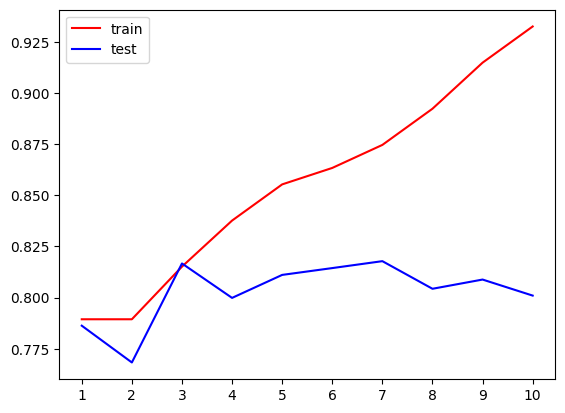

In [44]:
#利用學習曲線調max_depth參數

tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy")
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

#在 max_depth = 3 時，測試集和訓練集最接近

In [47]:
#利用網格搜索調參數
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,"min_samples_leaf":[*range(1,20,5)]
              ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]}

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_


{'criterion': 'entropy',
 'max_depth': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [48]:
GS.best_score_

0.8247567844342039